# Membrane-substrate distance

#### Studing the adhesion state of giant unilamellar vesicles using reflection interference contrast microscopy (RICM):
The effective reflection coefficient:
$$R = r_{01} + [(1-r_{01}^2) e^{-i k \Delta_1}]r_{12} + [(1-r_{01}^2)(1-r_{12}^2) e^{-i k (\Delta_1 + \Delta_2)}]r_{23} + [(1-r_{01}^2)(1-r_{12}^2)(1-r_{23}^2) e^{-i k (\Delta_1 + \Delta_2 + \Delta_3)}]r_{34}$$
#### where:
$$ r_{ij} = \frac{n_i - n_j}{n_i + n_j} \ ,\  k = \frac{2 \pi}{\lambda} \ ,\ \Delta_i = 2 n_i d_i$$

$n_i$: refractive index of the layer i 

$\lambda$: wavelength of incident light = 546 nm

$d_i$: thicknesses of the layers transversed by the light

#### The objective is to determine the height of the vesicle membrane on the substrate:
$$h = d_2$$

#### To get the relation between intensity and height we fit with the cosine function
$$R_{norm} = y_0 - A \cos \left(\frac{4 \pi n_2}{\lambda} (h - h_0) \right)$$

In [1]:
# Libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from ipywidgets import interact, widgets

# RICM Model

In [2]:
# Normalized reflactance for 3 interfaces
def R3_norm(h, n_inner = 1.344):
    
    # Parameters
    n_glass = 1.525  # Refractive index of glass 
    n_outer = 1.335  # Refractive index of PBS
    n_lipid = 1.486  # Refractive index of lipid=
    
    d_lipid = 4      # Thikness of lipid in nm
    
    l = 546          # Wave length of the RICM light in nm
    
    # Wave vector
    k = (2 * np.pi) / l
    
    # Refractive indices
    n0 = n_glass    # Glass slid
    n1 = n_lipid    # SLB 
    n2 = n_outer    # Outer buffer PBS
    n3 = n_lipid    # Vesicle membrane
    n4 = n_inner    # Inner buffer Sucrose

    # Fresnel reflection coefficients
    r01 = (n0 - n1) / (n0 + n1)
    r12 = (n1 - n2) / (n1 + n2)
    r23 = (n2 - n3) / (n2 + n3)
    r34 = (n3 - n4) / (n3 + n4)

    # Distances traveled by light
    D1 = 2 * n1 * d_lipid
    D2 = 2 * n2 * h
    D3 = 2 * n3 * d_lipid
    
    # Effective reflection coefficient of the adhesion zone
    R = r01 + ((1-r01**2) * np.exp(-1j*k*D1)) * r12 + ((1-r01**2)*(1-r12**2) * np.exp(-1j*k*(D1+D2))) * r23 + ((1-r01**2)*(1-r12**2)*(1-r23**2) * np.exp(-1j*k*(D1+D2+D3))) * r34

    # Effective reflection coefficient of the background
    R_b = r01 + ((1-r01**2) * np.exp(-1j*k*D1)) * r12

    # Normalized reflactance R_norm
    R_norm = np.abs(R * np.conjugate(R)) / np.abs(R_b * np.conjugate(R_b))
    
    return R_norm


# Normalized reflactance for 5 interfaces
def R5_norm(h, n_inner = 1.344):
    
    # Parameters
    n_glass = 1.525  #refractive index of glass 
    n_water = 1.333  #refractive index of water
    n_outer = 1.335  #refractive index of PBS
    n_lipid = 1.486  #refractive index of lipid=
    
    d_water = 1      #thikness of water in nm
    d_lipid = 4      #thikness of lipid in nm
    
    l = 546          #wave length of the RICM light in nm
    
    # Wave vector
    k = (2 * np.pi) / l
    
    # Refractive indices
    n0 = n_glass    # Glass slid
    n1 = n_water    # Layer of water down the SLB
    n2 = n_lipid    # SLB 
    n3 = n_outer    # Outer buffer PBS
    n4 = n_lipid    # Vesicle membrane
    n5 = n_inner    # Inner buffer Sucrose

    # Fresnel reflection coefficients
    r01 = (n0 - n1) / (n0 + n1)
    r12 = (n1 - n2) / (n1 + n2)
    r23 = (n2 - n3) / (n2 + n3)
    r34 = (n3 - n4) / (n3 + n4)
    r45 = (n4 - n5) / (n4 + n5)

    # Distances traveled by light
    D1 = 2 * n1 * d_water
    D2 = 2 * n2 * d_lipid
    D3 = 2 * n3 * h
    D4 = 2 * n4 * d_lipid  
    
    # Effective reflection coefficient of the adhesion zone
    R = r01 + ((1-r01**2) * np.exp(-1j*k*D1)) * r12 + ((1-r01**2)*(1-r12**2) * np.exp(-1j*k*(D1+D2))) * r23 + ((1-r01**2)*(1-r12**2)*(1-r23**2) * np.exp(-1j*k*(D1+D2+D3))) * r34 + ((1-r01**2)*(1-r12**2)*(1-r23**2)*(1-r34**2) * np.exp(-1j*k*(D1+D2+D3+D4))) * r45

    # Effective reflection coefficient of the background
    R_b = r01 + ((1-r01**2) * np.exp(-1j*k*D1)) * r12 + ((1-r01**2)*(1-r12**2) * np.exp(-1j*k*(D1 + D2))) * r23

    # Normalized reflactance R_norm
    R_norm = np.abs(R * np.conjugate(R)) / np.abs(R_b * np.conjugate(R_b))
    
    return R_norm

def normalized_intensity(h, Y0, A, h0):

    # Parameters
    # Refractive index of the outer buffer PBS n3 = 1.335
    # Wave length of the RICM light l = 546 nm      

    return Y0 - A * np.cos((4 * np.pi * 1.335 / 546) * (h - h0))

### Fit for the parameters $Y_0, A, h_0$ of the cosine function:

Fitting parameters: Y0=1.01, A=0.24, h0=33.14


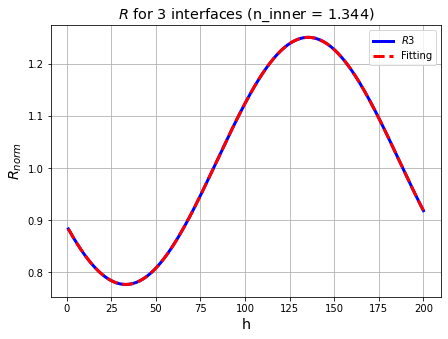

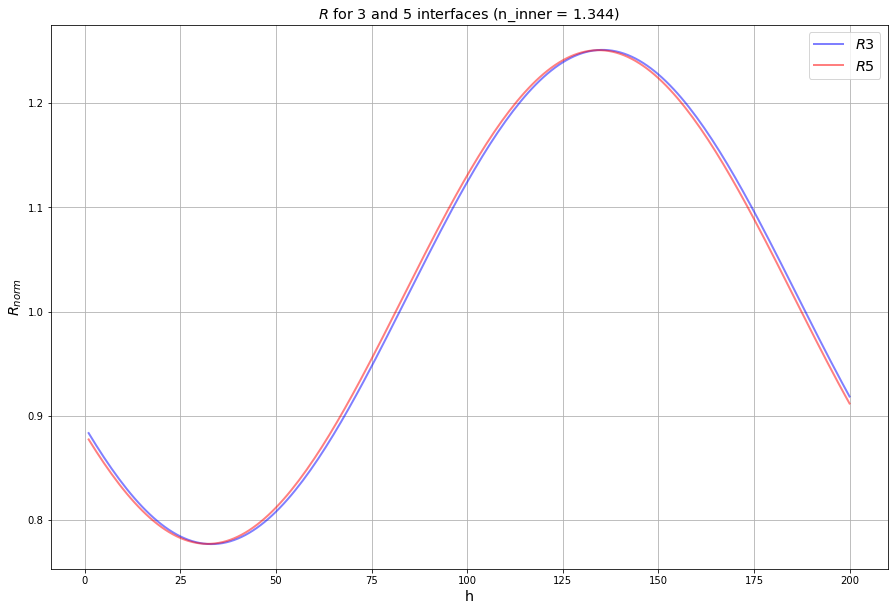

In [3]:
h = np.linspace(1, 200, 200)
n_in = 1.344

# Fit with the cosine function
popt, pcov = curve_fit(normalized_intensity, h, R3_norm(h, n_inner = n_in))
print('Fitting parameters: Y0={:.2f}, A={:.2f}, h0={:.2f}'.format(*popt))

# Show the 3 interfaces model with curve fitted
plt.figure(figsize=(7,5))

plt.plot(h, R3_norm(h, n_inner = n_in), 'b-', label='$R3$', linewidth=3)
plt.plot(h, normalized_intensity(h, *popt), 'r--', label='Fitting', linewidth=3)

plt.xlabel('h', fontsize= 'x-large')
plt.ylabel('$R_{norm}$', fontsize= 'x-large')
plt.title("$R$ for 3 interfaces (n_inner = {})".format(n_in), fontsize= 'x-large')
plt.legend()
plt.grid()

# Show the 3 interfaces model together with the 5 interfaces model
plt.figure(figsize=(15,10))

plt.plot(h, R3_norm(h, n_inner = n_in), 'b-', label='$R3$', linewidth=2, alpha = 0.5)
plt.plot(h, R5_norm(h, n_inner = n_in), 'r-', label='$R5$', linewidth=2, alpha = 0.5)

plt.xlabel('h', fontsize= 'x-large')
plt.ylabel('$R_{norm}$', fontsize= 'x-large')
plt.title("$R$ for 3 and 5 interfaces (n_inner = {})".format(n_in), fontsize= 'x-large')
plt.legend(fontsize = 'x-large')
plt.grid()
plt.show()